### Data Acquisition
1. connect the drive and read datasets.
2. display the datasetfile
3. combine all the datafiles to one dataframe (movie_score_tag_rating_df)
>* a.concat movie and genres.
>* b.merge file scores and tags on movies.
>* c.compute the average rating and merge on new dataframe.
4. generate a new csv file for the last dataframe.



In [2]:
#加载drive文件
import pandas as pd
from google.colab import drive

drive.mount('/content/drive') #connect the drive
dataset_file = '/content/drive/MyDrive/W-Workspace/MovieLens_da_li/dataset'


Mounted at /content/drive


In [3]:
# 导入数据
movies_df = pd.read_csv(dataset_file + '/movies.csv', sep=',')
scores_df = pd.read_csv(dataset_file + '/genome-scores.csv', sep=',')
tags_df = pd.read_csv(dataset_file + '/genome-tags.csv', sep=',')
ratings_df = pd.read_csv(dataset_file + '/ratings.csv', sep=',')

In [4]:
#预览
display(movies_df)
display(scores_df)
display(tags_df)
display(ratings_df)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [5]:
# One-hot 编码和合并 genres
genres = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres], axis=1)
movies_df.drop('genres', axis=1, inplace=True) # 注意这里如果genres不删掉，会影响后续的分析结果。因为genres是一个List。

#display(movies_df)

# 合并scores和tags
movies_scores_tag_df = movies_df.merge(scores_df, on='movieId').merge(tags_df, on='tagId')

# 创建透视表
movie_score_tag_relation_df = movies_scores_tag_df.pivot_table(
    index=['movieId', 'title'],
    columns='tag',
    values='relevance',
    fill_value=0
).reset_index().rename_axis(None, axis=1)

# 计算平均评分并合并 rating 和 score tags
movies_ratings_df = ratings_df.groupby('movieId')['rating'].mean().reset_index()
movie_score_tag_rating_df = movie_score_tag_relation_df.merge(movies_ratings_df, on='movieId')

# 合并 rating 和 genres
movies_genres_rating_df = movies_df.merge(movies_ratings_df, on='movieId')
movies_genres_rating_df.drop('movieId', axis=1, inplace=True)

# 删除不需要的列
movie_score_tag_rating_df.drop(['movieId', 'title'], axis=1, inplace=True)

In [6]:
# 导出数据
movie_score_tag_rating_df.to_csv(dataset_file + '/dataset.csv', index=False)
movies_genres_rating_df.to_csv(dataset_file + '/dataset_genres_rating.csv', index=False)

# 展示数据
#display(movie_score_tag_rating_df)
#display(movies_genres_rating_df)

# Data visualization


1.   read the dataset
2.   print the satisfication of the data
3.   draw the graph
*   a.Rating Distribution
*   b.Rating of Each Genre
*   c.Correlation Distribution between Ratings and Tags
*   d.Correlation between genres and ratings
*   e.2D Representation of the Dataset



In [7]:
df = pd.read_csv(dataset_file + '/dataset.csv', sep=',')
df_genres_rating = pd.read_csv(dataset_file + '/dataset_genres_rating.csv', sep=',')

display(df)

,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,...,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies,rating
0,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.20200,0.03075,...,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200,3.893708
1,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.07650,0.05250,...,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975,3.251527
2,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.02850,0.03875,...,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775,3.142028
3,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.03200,0.03150,...,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500,2.853547
4,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.02150,0.02975,...,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600,3.058434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13811,0.02050,0.01775,0.11400,0.03650,0.31225,0.03675,0.10700,0.37925,0.01725,0.36350,...,0.03650,0.03025,0.12900,0.13975,0.42425,0.03400,0.02350,0.41725,0.09100,3.310345
13812,0.03825,0.03150,0.03200,0.05325,0.20850,0.07050,0.06625,0.27825,0.00950,0.02750,...,0.03225,0.04675,0.03175,0.23025,0.06300,0.04175,0.04125,0.07275,0.02350,3.216981
13813,0.04100,0.04025,0.02750,0.07850,0.19750,0.17825,0.17125,0.30475,0.16825,0.04850,...,0.03250,0.02400,0.03575,0.20400,0.08525,0.04600,0.02900,0.11725,0.03925,3.642857
13814,0.04525,0.04125,0.04250,0.07425,0.11550,0.10500,0.08275,0.13575,0.16125,0.05875,...,0.04550,0.01425,0.03925,0.21700,0.06000,0.07250,0.01500,0.11050,0.02850,3.543478


In [8]:
print('Number of samples:', df.shape[0])
print('Null values:', df.isna().sum().sum())
print('Duplicates values:', df.duplicated().sum())
print('Mean if rating:', df['rating'].mean())
print('Media of rating:', df['rating'].median())
print('Standard deviation of rating:', df['rating'].std())
print('Mode of rating:', df['rating'].mode())

Number of samples: 13816
Null values: 0
Duplicates values: 0
Mean if rating: 3.272179588605234
Media of rating: 3.3404197252023344
Standard deviation of rating: 0.4840784613559378
Mode of rating: 0    3.5
Name: rating, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 默认样式
sns.set(style="whitegrid")

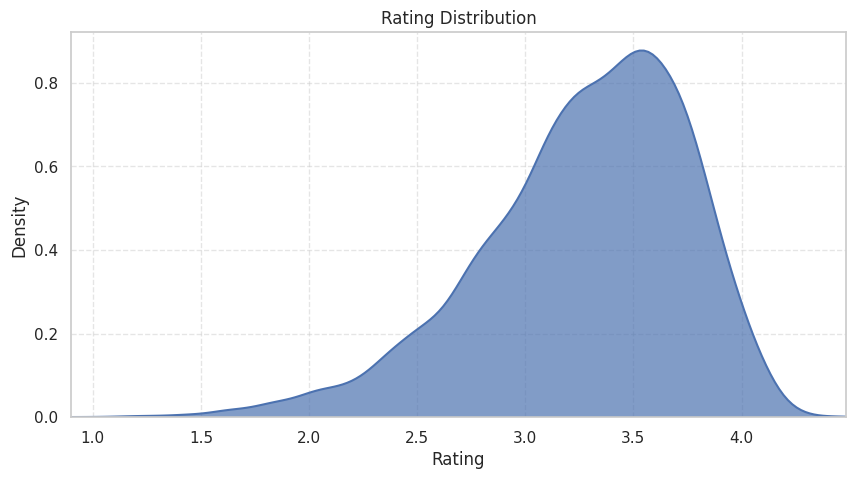

In [10]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['rating'], fill=True, alpha=0.7, linewidth=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.xlim(df['rating'].min(), df['rating'].max())  # 设置 x 轴边界
plt.show()

In [11]:
# 假设 dataset_genres_rating_df 是您的 DataFrame
genres = df_genres_rating.columns[1:]

# 收集每个类型的平均评分
genres_ratings_data = []
for genre in genres:
    # 确保不计算 'rating' 列的平均值
    if genre != 'rating':
        rating = df_genres_rating[df_genres_rating[genre] == 1]['rating'].mean()
        genres_ratings_data.append([genre, rating])

# 创建 DataFrame
genres_rating = pd.DataFrame(genres_ratings_data, columns=['genre', 'rating'])
display(genres_rating)

# 排序
genres_rating = genres_rating.sort_values(by='rating', ascending=True)

,genre,rating
0,(no genres listed),3.048613
1,Action,2.926390
2,Adventure,3.011600
3,Animation,3.101145
4,Children,3.033051
5,Comedy,3.041878
6,Crime,3.092680
7,Documentary,3.382493
8,Drama,3.178996
9,Fantasy,3.020801


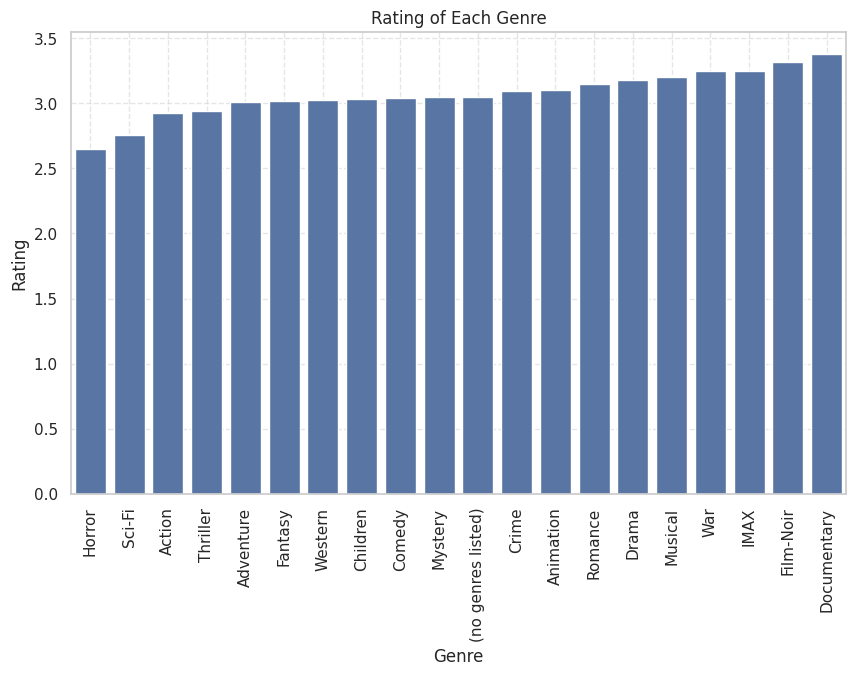

In [12]:
# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='rating', data=genres_rating)
plt.xticks(rotation=90)  # 旋转 x 轴标签，以便更好地显示
plt.grid(True, zorder=1, linestyle='--', alpha=0.5)
plt.title('Rating of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

In [13]:
# 计算相关性
movies_genres = movies_df.copy()
## data visualization
movies_genres = movies_genres.merge(movies_ratings_df, on='movieId')
movies_genres.drop('movieId', axis=1, inplace=True)

<ipython-input-14-d27880f85636>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_rating_tag = movies_genres.corr()


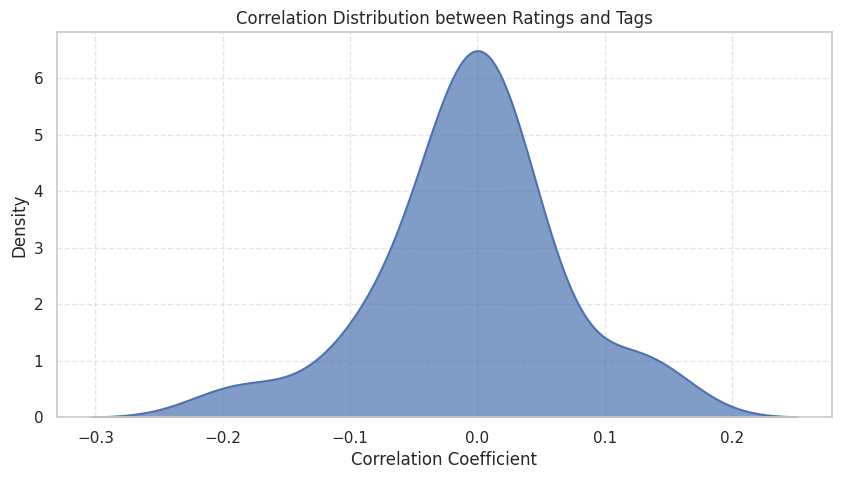

In [14]:
# 计算 'rating' 与其他列的相关性
corr_rating_tag = movies_genres.corr()
corr_rating_tag = corr_rating_tag['rating'].sort_values(ascending=False)
corr_rating_tag = corr_rating_tag.drop('rating')

# 绘制核密度估计图
plt.figure(figsize=(10, 5))
sns.kdeplot(corr_rating_tag.values, fill=True, alpha=0.7, linewidth=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Correlation Distribution between Ratings and Tags')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.show()

<ipython-input-15-d8c01077011b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_rating_genre = movies_genres.corr()['rating'].sort_values(ascending=True).drop('rating')[1:]


Sci-Fi               -0.105498
Action               -0.071361
Thriller             -0.069524
Comedy               -0.024360
Adventure            -0.021391
Fantasy              -0.014867
Children             -0.011700
(no genres listed)   -0.008908
Western              -0.008713
Mystery              -0.007690
Crime                 0.008782
Animation             0.009164
IMAX                  0.014063
Musical               0.023111
Film-Noir             0.025719
Romance               0.038457
War                   0.041615
Drama                 0.122353
Documentary           0.134138
Name: rating, dtype: float64


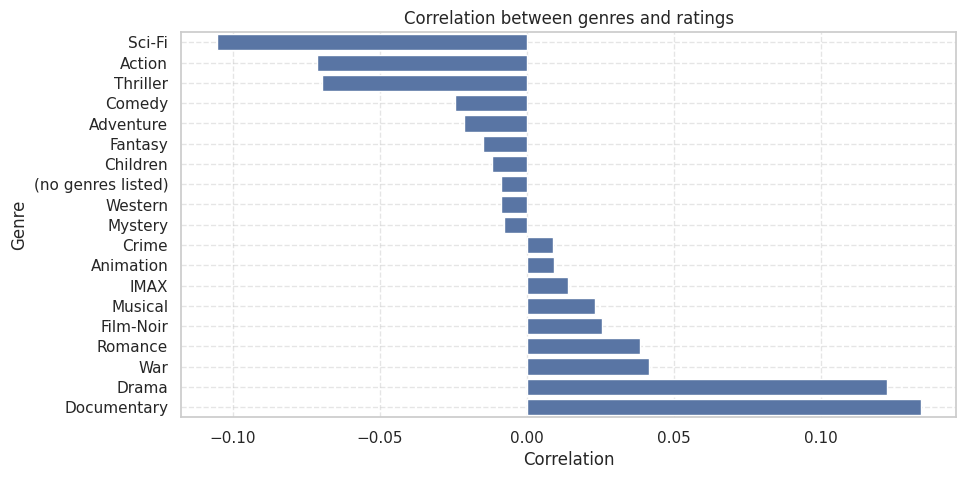

In [15]:
# calculate the correlation between genres and ratings
corr_rating_genre = movies_genres.corr()['rating'].sort_values(ascending=True).drop('rating')[1:]

print(corr_rating_genre)

# plot the correlation
plt.figure(figsize=(10, 5))
sns.barplot(x=corr_rating_genre.values, y=corr_rating_genre.index)
plt.grid(True, zorder=1, linestyle='--', alpha=0.5)
plt.title('Correlation between genres and ratings')
plt.xlabel('Correlation')
plt.ylabel('Genre')
plt.show()

In [16]:
# 使用主成分分析（PCA）和 t-分布随机邻域嵌入（t-SNE）来对数据集进行降维，并通过散点图进行可视化
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 数据准备
x = df.drop('rating', axis=1)
y = df['rating']
# PCA
pca = PCA(n_components=0.95)
pca.fit(x)
X = pca.transform(x)

# t-SNE 降维：perplexity 困惑度，n_iter 迭代次数。一般 5 <= perplexity <= 50, 250 <= n_iter <= 1000。
# 根据数据的大小，点多perplexity的值大, n_iter大迭代多。
tsne = TSNE(n_components=2, random_state=1, perplexity=30, n_iter=1000)
X_train = tsne.fit_transform(X)

# 输出打印检测结果
print('x:', x.head)
print('y:',y.head)
print('X:',X[:5])
print('X_train:',X_train[:5])


x: <bound method NDFrame.head of            007  007 (series)  18th century    1920s    1930s    1950s  \
0      0.02875       0.02375       0.06250  0.07575  0.14075  0.14675   
1      0.04125       0.04050       0.06275  0.08275  0.09100  0.06125   
2      0.04675       0.05550       0.02925  0.08700  0.04750  0.04775   
3      0.03425       0.03800       0.04050  0.03100  0.06500  0.03575   
4      0.04300       0.05325       0.03800  0.04100  0.05400  0.06725   
...        ...           ...           ...      ...      ...      ...   
13811  0.02050       0.01775       0.11400  0.03650  0.31225  0.03675   
13812  0.03825       0.03150       0.03200  0.05325  0.20850  0.07050   
13813  0.04100       0.04025       0.02750  0.07850  0.19750  0.17825   
13814  0.04525       0.04125       0.04250  0.07425  0.11550  0.10500   
13815  0.10050       0.09325       0.02225  0.04550  0.21125  0.06125   

         1960s    1970s    1980s  19th century  ...  world politics  \
0      0.06350  0.2

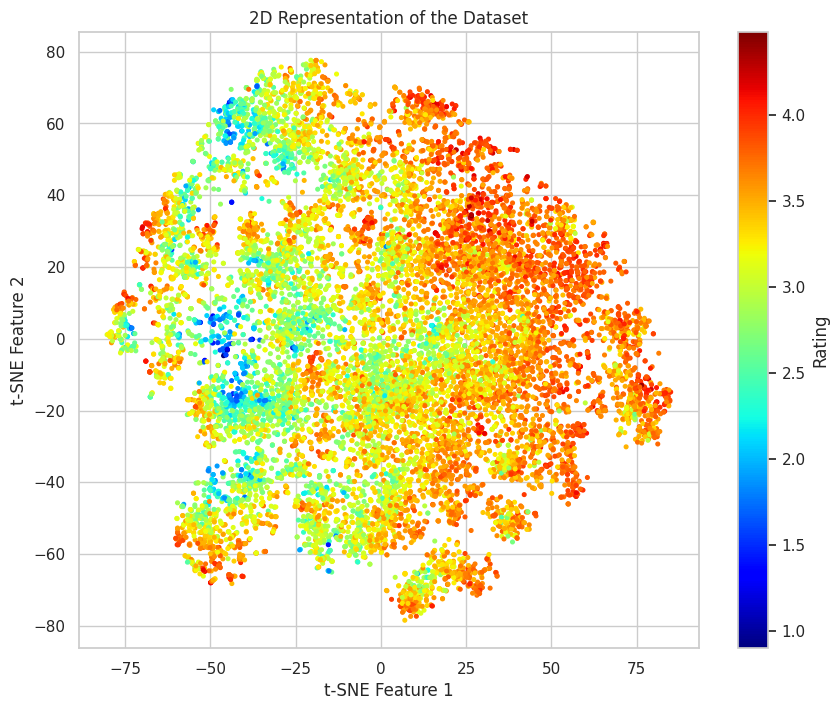

In [17]:
# 散点图进行可视化
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap='jet', s=7)
plt.title('2D Representation of the Dataset')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(scatter, label='Rating')
plt.show()